# Lecture 9: Plotting and Matplotlib

## Graphs and visualization

Data analysis starts with looking at data, and ends with communicating your results. Both of these are done most effectively with graphs.

There are many skills associated with making graphs and visualizations:

0. figuring out *what* to plot to answer a question.

1. transforming data to expose the variables you want to plot

2. choosing the right kind of plot for the data / question.

3. instructing a computer to make the plot you want.

4. making the plot interpretable, and appealing

We focus on 3 here.

## Our data

[gapminder](https://www.gapminder.org/tools/#$chart-type=bubbles&url=v1)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_url = 'https://raw.githubusercontent.com/UCSD-CSS-001/ucsd-css-001.github.io/main/live/gapminder.csv'
gapminder = pd.read_csv(data_url).drop(columns = 'Unnamed: 0')

In [3]:
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [4]:
continents = (gapminder[gapminder['year']==2007]
              .groupby('continent')
              .agg(total_population = ('pop', 'sum'))
              .reset_index())
continents

,continent,total_population
0,Africa,929539692
1,Americas,898871184
2,Asia,3811953827
3,Europe,586098529
4,Oceania,24549947


<BarContainer object of 5 artists>

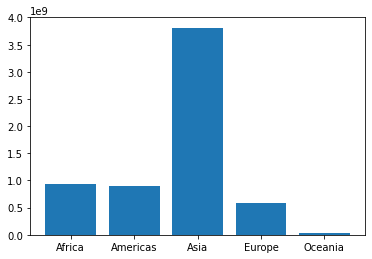

In [5]:
plt.bar(continents['continent'], continents['total_population'])

<BarContainer object of 5 artists>

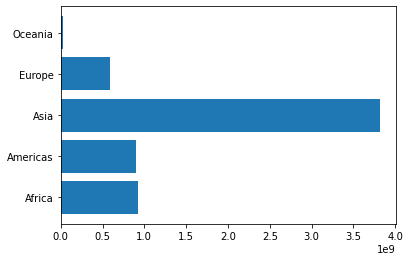

In [6]:
plt.barh(continents['continent'], continents['total_population'])

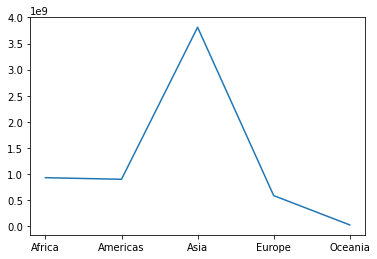

In [7]:
plt.plot(continents['continent'], continents['total_population'])

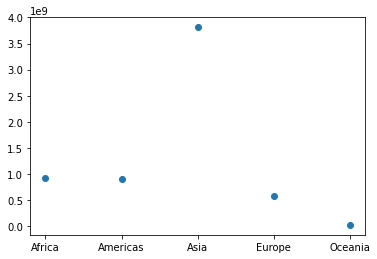

In [8]:
plt.scatter(continents['continent'], continents['total_population'])

## Conventions

> Learn the rules like a pro, so you can break them like an artist. 
> 
> -- *Pablo Picasso*


#### Numbers vs Categories

#### Distribution vs mean "as a function of"


### Histogram

Show the *distribution* of some variable, which values are more or less common?

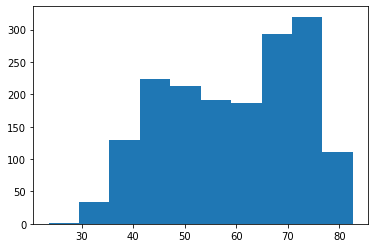

In [9]:
_ = plt.hist(gapminder['lifeExp'])

- What's with the `_ = `?
- Desperately needed: axis labels!  Title!
- Tweaks: bins, color

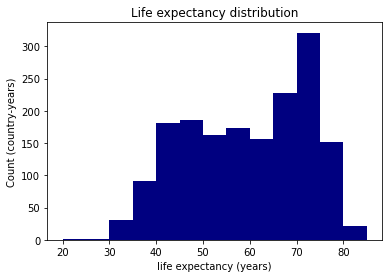

In [10]:
_ = plt.hist(gapminder['lifeExp'], 
             bins=range(20, 90, 5), 
             color='navy')
_ = plt.xlabel('life expectancy (years)')
_ = plt.ylabel('Count (country-years)')
_ = plt.title('Life expectancy distribution')

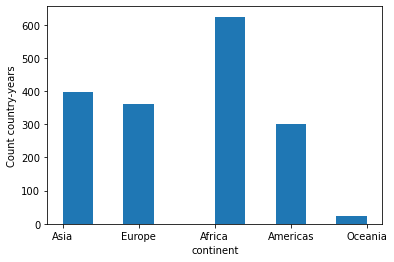

In [11]:
_ = plt.hist(gapminder['continent'])
_ = plt.xlabel('continent')
_ = plt.ylabel('Count country-years')

In [12]:
?plt.hist

### Bar chart

How does life expectancy differ by continent?

{numerical variable} ~ {categorical}  -> bar plot 

category on the x axis, number on the y axis.  
and we get 1 number per category.

Mean life expectancy, in 2007, by continent


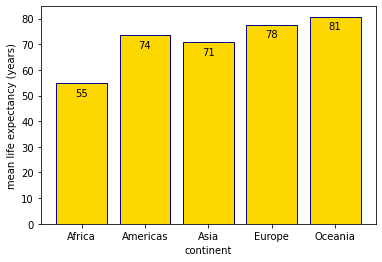

In [13]:
## pick just 2007
## group by continent
## calculate mean life expectancy per group
continent_summary = (gapminder[gapminder['year'] == 2007]
 .groupby('continent')
 .agg(mean_life_expectancy = ('lifeExp', 'mean'))
 .reset_index())

## make a bar plot
_ = plt.bar(continent_summary['continent'], 
            continent_summary['mean_life_expectancy'],
           color = 'gold',
           edgecolor = 'navy')
## label stuff!
_ = plt.xlabel('continent')
_ = plt.ylabel('mean life expectancy (years)')

# print the mean value above each bar
for (c, le) in zip(continent_summary['continent'], 
            continent_summary['mean_life_expectancy']):
    _ = plt.text(c,le-5,f'{le:0.0f}', ha='center')


In [14]:
x = 2.8234567890
f'{x :0.2f}'

'2.82'

### Line plot

How has average life expectancy changed from 1952 to 2007?

{number} ~ {number} -> line plot

Mean life expectancy, by year.

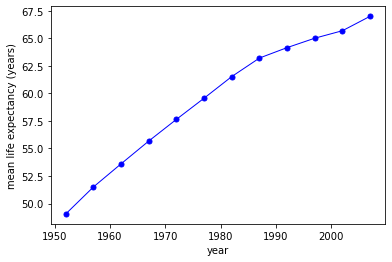

In [15]:
## group by year
## calculate mean life expectancy per group

year_summary = (gapminder
    .groupby('year')
    .agg(life_expectancy = ('lifeExp', 'mean'))
    .reset_index())

## make a line plot

_ = plt.plot(year_summary['year'], 
             year_summary['life_expectancy'],
            'ko-',
            color = 'blue',
            markersize = 5,
            linewidth = 1)

## label stuff!
_ = plt.xlabel('year')
_ = plt.ylabel('mean life expectancy (years)')

In [16]:
?plt.plot

### Scatter plot

How does the *distribution* of life expectancies across African countries vary by year?

distribution of two number -> scatterplot

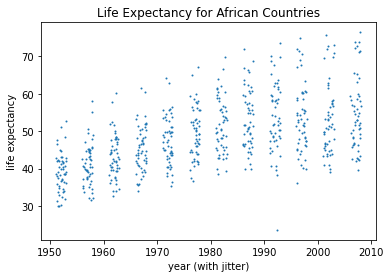

In [17]:
import numpy as np

## filter out African countries
africa = gapminder[gapminder['continent'] == 'Africa']
## plot scatter plot of lifeExp ~ year

# alpha like
# _ = plt.scatter(africa['year'], 
#                 africa['lifeExp'],
#                alpha = 0.1,
#                s=200)

_ = plt.scatter(africa['year'] + np.random.random(len(africa))*2-1, 
                africa['lifeExp'],
               s=1)
_ = plt.xlabel('year (with jitter)')
_ = plt.ylabel('life expectancy')
_ = plt.title('Life Expectancy for African Countries')


## make sure it is legible!  (alpha, size, jitter)
## label stuff!

## Complexities

- Using logarithms

$3^2$

In [18]:
import math
print(f'{(3 ** 4)=}')  # 1 * 3 * 3 * 3 * 3
print(f'{math.log(81, 3)=}')

(3 ** 4)=81
math.log(81, 3)=4.0


In [19]:
from numpy import log10

print(10 ** 3)
log10(3000000)

1000


6.477121254719663

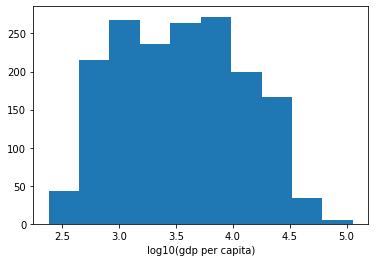

In [20]:
_ = plt.hist(log10(gapminder['gdpPercap']))
_ = plt.xlabel('log10(gdp per capita)')

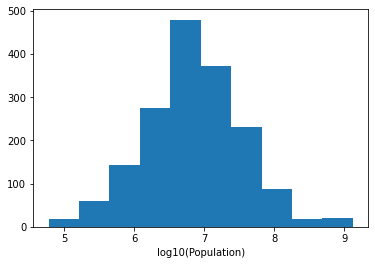

In [21]:
_ = plt.hist(log10(gapminder['pop']))
_ = plt.xlabel('log10(Population)')

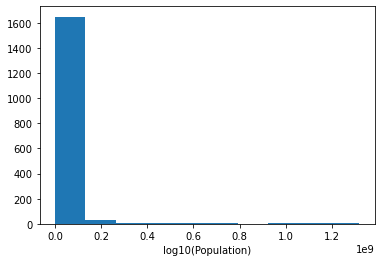

In [22]:
_ = plt.hist(gapminder['pop'])
_ = plt.xlabel('log10(Population)')

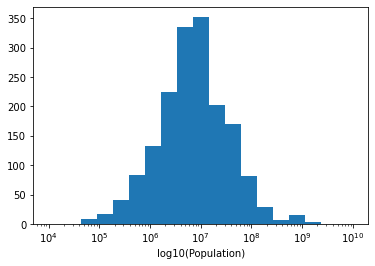

In [23]:
_ = plt.hist(gapminder['pop'], bins = 10**np.linspace(4, 10, 20))
_ = plt.xlabel('log10(Population)')
_ = plt.xscale('log')

In [24]:
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


- Varying color and size

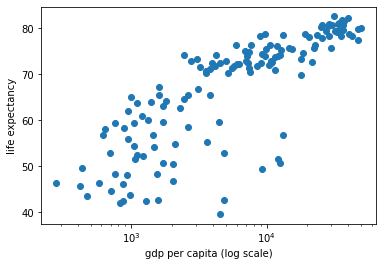

In [25]:
year_2007 = gapminder[gapminder['year']==2007]
_ = plt.scatter(year_2007['gdpPercap'], year_2007['lifeExp'])
_ = plt.xscale('log')
_ = plt.xlabel('gdp per capita (log scale)')
_ = plt.ylabel('life expectancy')

# color code by continent
# sale size by population

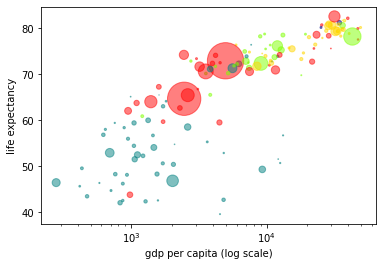

In [26]:
year_2007 = gapminder[gapminder['year']==2007]

colors = {'Asia': 'red',
          'Europe' : 'gold',
           'Americas':'chartreuse',
           'Africa':'teal',
            'Oceania':'navy'}

_ = plt.scatter(year_2007['gdpPercap'], 
                year_2007['lifeExp'],
                s = year_2007['pop']/1e6,
                c = year_2007['continent'].map(colors),
                alpha = 0.5)
_ = plt.xscale('log')
_ = plt.xlabel('gdp per capita (log scale)')
_ = plt.ylabel('life expectancy')

# color code by continent
# sale size by population

### Conventions

**Distribution of Number** -> histogram, with number on x, counts on y

**Distribution of Category** -> histogram, with category on x, counts on y

**Number as a function of Category** -> bar chart, category on x, mean number on y

**Number as a function of Number** -> scatter plot (y~x) or line plot (mean(y) ~ x)

**Number as a function of Number + Category** -> scatter plot or line plot with color varying by category.

**Number as a function of Number + Number** -> if it doesnt matter much: bubble chart.  If it matters a lot, considering binning into categories.

